# Function Approximation

使用单层的神经网络近似三角函数。

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from easytorch.layer import Linear, ReLU, Tanh, Sequential
from easytorch.optim import SGD
from easytorch.tensor import Tensor
import easytorch.functional as F

In [2]:
def generate_data(n=100, f=lambda x: 2*np.sin(x) + np.cos(x)):
    data = []
    for _ in range(n):
        x = np.random.uniform(-3, 3)
        y = f(x) + 0.03 * np.random.randn()
        data.append([x, y])
    return data

In [3]:
train_data = generate_data()
x = Tensor(np.array([x for x, y in train_data]).reshape(-1, 1))
y = Tensor(np.array([y for x, y in train_data]).reshape(-1, 1))

In [4]:
model = Sequential(
    Linear(1, 5),
    Tanh(),
    Linear(5, 1)
)
opt = SGD(model.parameters(), lr=3e-3)
loss_fn = F.mse_loss
loss_list = []

In [5]:
for epoch in tqdm(range(700)):
    for data_x, data_y in zip(x, y):
        pred = model(data_x)
        loss = loss_fn(pred, data_y.reshape(-1, 1))
        opt.zero_grad()
        loss.backward()
        opt.step()
    loss_list.append(loss.data)

100%|██████████| 700/700 [00:16<00:00, 42.21it/s]


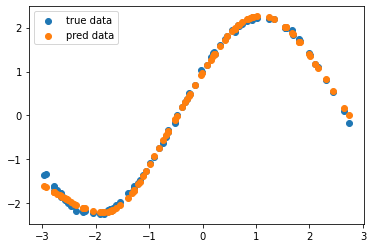

In [6]:
# plt.plot(loss_list)
# plt.show()

plt.scatter(x.data, y.data, label='true data')
plt.scatter(x.data, model(x).data, label='pred data')
plt.legend()
plt.show()